In [33]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [34]:
# Load dataset
file_path = "_classes.csv"
data = pd.read_csv(file_path)

In [35]:
# Check dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     451 non-null    object
 1    Fresh       451 non-null    int64 
 2    Half-Fresh  451 non-null    int64 
 3    Spoiled     451 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ KB


- Data diatas menjelaskan, bahwa dataset memiliki 451 baris dan 4 kolom yaitu (filename, Fresh, Half-Fresh dan Spoiled)
- Semua kolom memiliki 451 non-null yang artinya tidak terdapat missing values

In [36]:
# Clean column names
data.columns = data.columns.str.strip()

In [37]:
# Check dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    451 non-null    object
 1   Fresh       451 non-null    int64 
 2   Half-Fresh  451 non-null    int64 
 3   Spoiled     451 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ KB


In [38]:
# Check dataset information
data.head()

,filename,Fresh,Half-Fresh,Spoiled
0,HALF-FRESH-8-_JPG.rf.5bf1ec7ab3a5bca8b3a01bbd3...,0,1,0
1,FRESH-91-_JPG.rf.5ce4d7d669bae2d26735e4edf0a17...,1,0,0
2,FRESH-408-_JPG.rf.5ead7613098bae61f4a33fab1084...,1,0,0
3,FRESH-344-_JPG.rf.5e8ec1875092af8f909b876ee314...,1,0,0
4,HALF-FRESH-919-_JPG.rf.5f00a599bb9c9b7694db119...,0,1,0


In [39]:
data[['Fresh', 'Half-Fresh', 'Spoiled']].sum()

Fresh         178
Half-Fresh    159
Spoiled       114
dtype: int64

In [40]:
# Extract labels
labels = data[['Fresh', 'Half-Fresh', 'Spoiled']].values

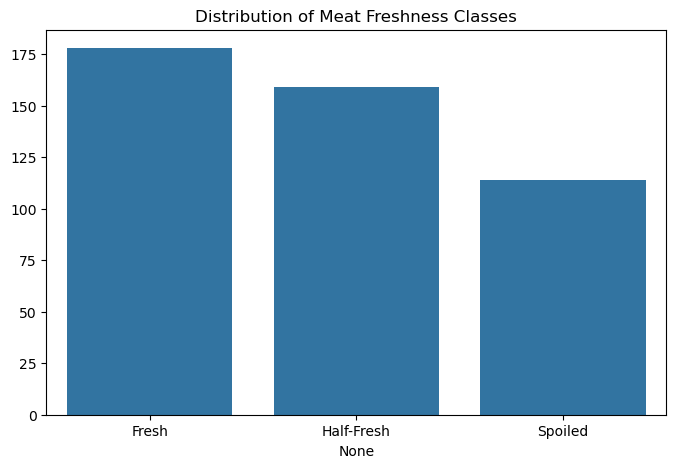

In [42]:
# Visualize class distribution
class_counts = data[['Fresh', 'Half-Fresh', 'Spoiled']].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Meat Freshness Classes")
plt.show()

# Distribution of Meat Freshness Classes
- Daging kategori Fresh memiliki jumlah data terbanyak yaitu 178 sampel
- Daging kategori Half-Fresh memiliki jumlah data terbanyak kedua yaitu 159 sampel
- Daging kategori Spoiled memiliki jumlah data paling sedikit dari kedua kategori yaitu 114 sampel.

In [43]:
# Load images and preprocess
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize
    return image

In [44]:
# Define image directory
image_dir = "C:/Users/ASUS/Pictures/sales force training/Case-study-kelas.work/valid"
data['file_path'] = data['filename'].apply(lambda x: os.path.join(image_dir, x))

In [46]:
# Display sample images
def display_sample_images(data, category, num_samples=5):
    sample_images = data[data[category] == 1]['file_path'].sample(num_samples, random_state=42).tolist()
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(sample_images):
        img = load_img(img_path, target_size=(224, 224))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(category)
    plt.show()

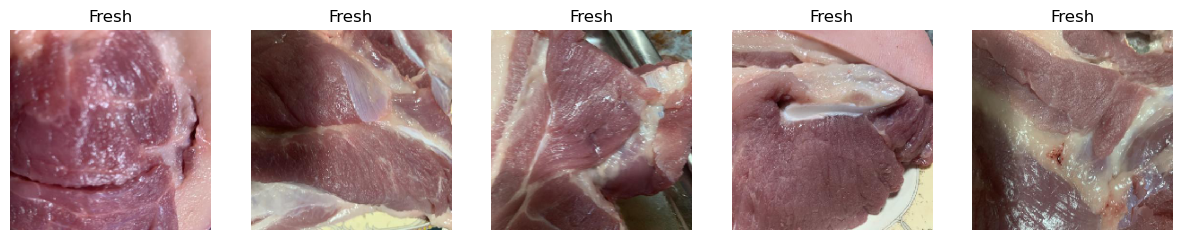

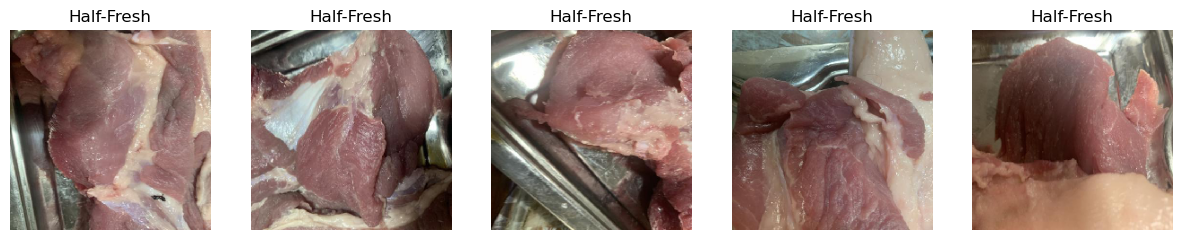

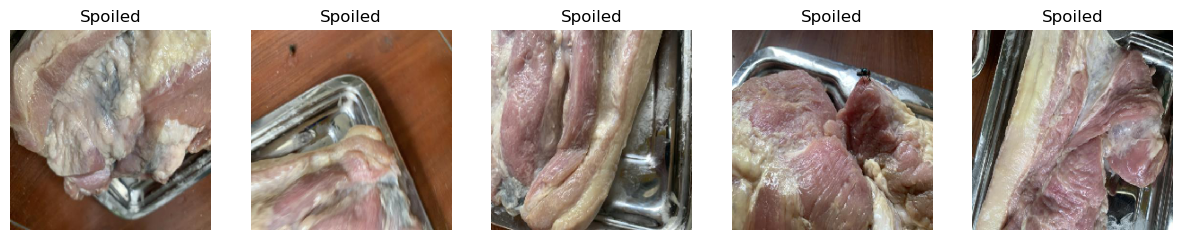

In [47]:
# Show sample images for each category
display_sample_images(data, "Fresh")
display_sample_images(data, "Half-Fresh")
display_sample_images(data, "Spoiled")

In [48]:
# Load all images
images = np.array([load_and_preprocess_image(img) for img in data['file_path']])

In [49]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [51]:
# Load Pretrained Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

In [52]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.5593 - loss: 0.9915 - val_accuracy: 0.7912 - val_loss: 0.4706
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8892 - loss: 0.2760 - val_accuracy: 0.8132 - val_loss: 0.3989
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9226 - loss: 0.1727 - val_accuracy: 0.8242 - val_loss: 0.4145
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9863 - loss: 0.1001 - val_accuracy: 0.8022 - val_loss: 0.4085
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9905 - loss: 0.0654 - val_accuracy: 0.8681 - val_loss: 0.3494
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9914 - loss: 0.0530 - val_accuracy: 0.8571 - val_loss: 0.3241
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.0000 - loss: 0.0410 - val_accuracy: 0.8242 - val_loss: 0.3999
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9994 - loss: 0.0342 - val_accuracy: 0.7473 - val_loss:

- Akurasi training meningkat dari 55.93% ke 100%, yang menunjukan model mampu mengenali data training dengan sangat baik
- Loss training mengalami penurunan dari 0.99 - 0.0186, yang menunjukan model berjalan dengan baik.
- Val accuracy mengalami naik turun dengan hasil akhir 87.91%
- Val loss juga mengalami naik turun dengan hasil akhir 0.3289

In [54]:
# Evaluate Model
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)
print(classification_report(y_true, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.77      0.85      0.81        27
           2       1.00      0.92      0.96        25

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



- Accuracy menunjukan angka 88% yang bisa diartikan model cukup baik untuk mengenaii kesegaran daging
- Fresh (0) memiliki precision 89% dan recall 87% yang artinya cukup akurat
- Half-Fresh (1) memiliki precision 77% dan recall 85% model kurang akurat
- Spoiled (2) memiliki precision 100% dan recall 92% model bisa mengenail dengan baik

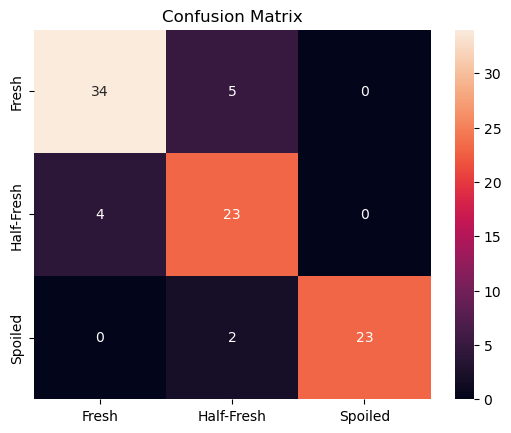

In [55]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['Fresh', 'Half-Fresh', 'Spoiled'], yticklabels=['Fresh', 'Half-Fresh', 'Spoiled'])
plt.title("Confusion Matrix")
plt.show()

# Analisa Confusion Matrix
- Model berhasil memprediksi Fresh dengan benar 34 kali, tetapi salah sebagai Hal-Fresh 5 kali
- Model memprediksi Half-Fresh dengan benar 23 kali, tetapi salah sebagai Fresh 4 kali
- Model memprediksi Spoiled dengan benar 23 kali, tapi salah sebagai Half-Fresh 2 kali